# **05. Plotting a heatmap to visualize the changes in deuterated fractions**

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Matplotlib settings for plotting
plt.rc('lines', linewidth=3, markersize=4)
plt.rc('axes', labelweight='heavy', labelsize=22, titlesize=22) # Default fontsizes for printing
plt.rc('axes.spines', top=False, right=False) # Switch off top/right axes
plt.rc('legend', fontsize=16) # Default fontsizes for printing
plt.rc('xtick', labelsize=16) # Default fontsizes for printing
plt.rc('ytick', labelsize=16) # Default fontsizes for printing
plt.rc('figure', titlesize=22, titleweight='heavy') # Default fontsizes for printing

A heatmap is a useful plot to visualize the changes in deuterated fractions from reweighting for each residue and each time point.

Using a heatmap, we can see which regions of proteins had the biggest changes in deuterated fractions more clearly than by overlaying the deuterated fractions on a line plot, as in notebook 4.

This notebook describes how to plot a heatmap.

### **Script to sum segment averages and take differences (Reweighted - Predicted)**

In [3]:
# Setup variables
times = np.array([0.167, 1.0, 10.0, 120.0]) # Create a NumPy array with time points in minutes
labels = ("Reweighted", "Predicted")
runs = 1

First, read in the deuterated fraction files from the **reweighting.py** output files and from the initial **calc_hdx.py** prediction output files before reweighting.

In [20]:
# Import files
results1 = []
for run in range(1, runs+1):
    results1.append(np.loadtxt(os.path.expandvars('$HDXER_PATH/protocol/BPTI/BPTI_reweighting/reweighting_gamma_2x10^0_final_segment_fractions.dat'), # Read in the reweighted deuterated fractions
                               dtype=[('fracs', np.float64, (len(times),))]))
    
results2 = []
for run in range(1, runs+1):
    results2.append(np.loadtxt(os.path.expandvars('$HDXER_PATH/protocol/BPTI/BPTI_calc_hdx/BPTI_SUMMARY_segment_average_fractions.dat'), # Read in the predicted deuterated fractions
                               usecols=[1,2,3,4,5], dtype=[('res', np.int32, (1,)), ('fracs', np.float64, (len(times),))]))

Calculate the differences in deuterated fractions (Reweighted - Predicted).

In [21]:
mean1 = np.mean([_['fracs'] for _ in results1], axis=0)
mean2 = np.mean([_['fracs'] for _ in results2], axis=0)

diffs = mean1 - mean2

Save the differences into a file (%s-%s_diffs.dat).

In [22]:
np.savetxt("%s-%s_diffs.dat" % labels, np.concatenate((results2[0]['res'], diffs), axis=1), \
           fmt="%3d " + "%8.5f "*4, header="ResID  Times / min: 0.167 1.0 10.0 120.0")

The "%s-%s_diffs.dat" file contains the residue-based deuterated fraction differences and residue numbers and can be used to recreate the plot without the links to the original data.

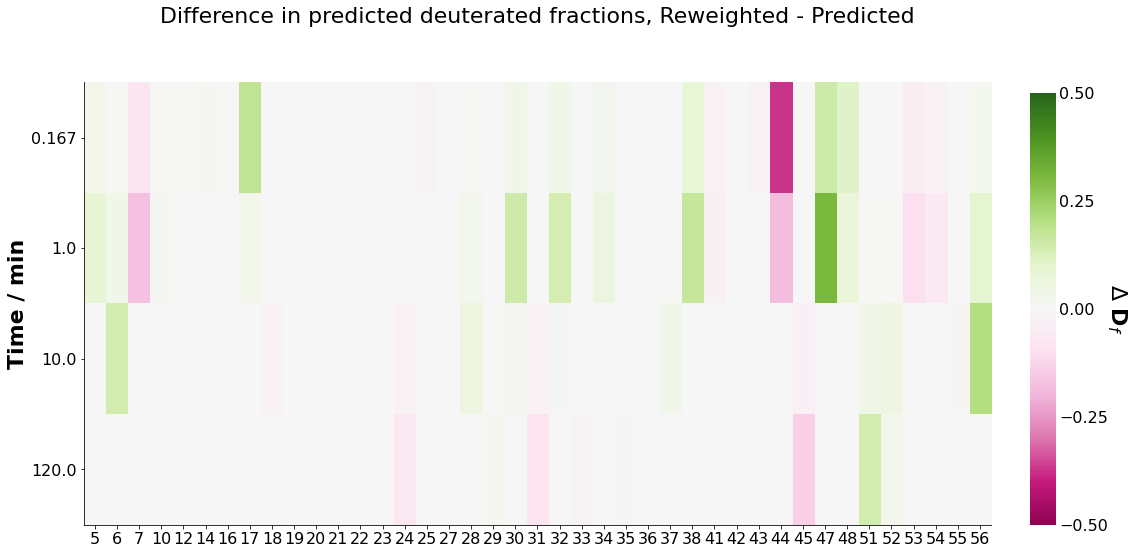

In [25]:
results1 = np.loadtxt("%s-%s_diffs.dat" % labels, dtype=[('res', np.int32, (1,))], usecols=(0,))
diffs = np.loadtxt("%s-%s_diffs.dat" % labels, usecols=(1,2,3,4))

xs = results1['res'].flatten()

# Make heatmap 
fig, axs = plt.subplots(1,1, figsize=(18, 12))

img = axs.imshow(diffs.T, cmap='PiYG', aspect=5.0, vmin=-0.5, vmax=0.5, interpolation='none')
axs.set_anchor('S')
axs.set_xticks(range(len(xs)))
axs.set_xticklabels(xs)
axs.set_yticks(list(range(len(times))))
axs.set_yticklabels(times)
axs.set_ylabel("Time / min")
axs.set_title("Difference in predicted deuterated fractions, %s - %s" % labels, y=1.12)
#axs[0].set_xlabel("Residue")

# Set size & location of colorbar
fig.subplots_adjust(bottom=0.1, top=0.75, left=0.1, right=0.8,
                    wspace=0.02, hspace=0.16)
cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.50])

#divider = make_axes_locatable(axs[0])
#cax0 = divider.append_axes("right", size="5%", pad=0.05)
#cax0.set_aspect('auto')
cbar = fig.colorbar(img, cax=cb_ax, ticks=np.arange(-0.5,0.75,0.25))
cbar.ax.set_ylabel(r"$\Delta$ D$_f$", rotation=270., labelpad=20)
cbar.ax.tick_params(axis='both', which='both',length=0)
cbar.outline.remove()

At this point, more in-depth analysis of the appropriately-weighted structures present in the final ensemble can be carried out however you desire. In this case, the difference that reweighting makes to the final predicted deuterated fractions is relatively small, and not uniformly distributed across the entire protein. In particular, reweighting does not seem to affect the predicted deuteration between residues 19-35, some of which showed large discrepancies to the experimental target data initially. However, other regions of the protein appear to agree well with the target data.

Given the extensive sampling of the 1ms BPTI trajectory, this may be a sign of inaccuracy in the 'Radou' forward model for these regions of BPTI. Further reweighing analyses, for example using an alternative forward model such as the Persson-Halle approach, would therefore be a sensible way forward to uncover the underlying factors governing the agreement of predicted and experimental HDX in BPTI. 